In [1]:
from pandas_profiling import ProfileReport

from sklearn import metrics
from analyse_dataset import filling_rate, analyse
from heatmap import heatmap, corrplot
from sklearn import decomposition
from sklearn import preprocessing
import math
import folium
import geopandas as gpd
import seaborn as sns
import os
import glob
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 100)

In [3]:
application_test = pd.read_csv('data/application_test.csv')
application_train = pd.read_csv('data/application_train.csv')
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
homecredit_col_desc = pd.read_csv('data/HomeCredit_columns_description.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [4]:
files = {'application_test':application_test,
        'application_train':application_train,
        'bureau':bureau,
        'bureau_blance':bureau_balance,
        'credit_card_balance':credit_card_balance,
        'homecredit_col_desc':homecredit_col_desc,
        'installments_payments':installments_payments,
        'pos_cash_balance':pos_cash_balance,
        'previous_application':previous_application,
        'sample_submission':sample_submission}

In [5]:
for i, j in files.items():
    print(i)
    print(j.shape)
    filling_rate(j)
    print('\n'*2)

application_test
(48744, 121)
                                variable name    data not NaN             type    Filling Rate  %
                                   SK_ID_CURR           48744            int64        100.0000 %
                           NAME_CONTRACT_TYPE           48744           object        100.0000 %
                                  CODE_GENDER           48744           object        100.0000 %
                                 FLAG_OWN_CAR           48744           object        100.0000 %
                              FLAG_OWN_REALTY           48744           object        100.0000 %
                                 CNT_CHILDREN           48744            int64        100.0000 %
                             AMT_INCOME_TOTAL           48744          float64        100.0000 %
                                   AMT_CREDIT           48744          float64        100.0000 %
                                  AMT_ANNUITY           48720          float64         99.9508 %

                                  CODE_GENDER          307511           object        100.0000 %
                                 FLAG_OWN_CAR          307511           object        100.0000 %
                              FLAG_OWN_REALTY          307511           object        100.0000 %
                                 CNT_CHILDREN          307511            int64        100.0000 %
                             AMT_INCOME_TOTAL          307511          float64        100.0000 %
                                   AMT_CREDIT          307511          float64        100.0000 %
                                  AMT_ANNUITY          307499          float64         99.9961 %
                              AMT_GOODS_PRICE          307233          float64         99.9096 %
                              NAME_TYPE_SUITE          306219           object         99.5799 %
                             NAME_INCOME_TYPE          307511           object        100.0000 %
                          NAME

                                CREDIT_ACTIVE         1716428           object        100.0000 %
                              CREDIT_CURRENCY         1716428           object        100.0000 %
                                  DAYS_CREDIT         1716428            int64        100.0000 %
                           CREDIT_DAY_OVERDUE         1716428            int64        100.0000 %
                          DAYS_CREDIT_ENDDATE         1610875          float64         93.8504 %
                            DAYS_ENDDATE_FACT         1082775          float64         63.0830 %
                       AMT_CREDIT_MAX_OVERDUE          591940          float64         34.4867 %
                           CNT_CREDIT_PROLONG         1716428            int64        100.0000 %
                               AMT_CREDIT_SUM         1716415          float64         99.9992 %
                          AMT_CREDIT_SUM_DEBT         1458759          float64         84.9881 %
                         AMT_C

                       NAME_CASH_LOAN_PURPOSE         1670214           object        100.0000 %
                         NAME_CONTRACT_STATUS         1670214           object        100.0000 %
                                DAYS_DECISION         1670214            int64        100.0000 %
                            NAME_PAYMENT_TYPE         1670214           object        100.0000 %
                           CODE_REJECT_REASON         1670214           object        100.0000 %
                              NAME_TYPE_SUITE          849809           object         50.8802 %
                             NAME_CLIENT_TYPE         1670214           object        100.0000 %
                          NAME_GOODS_CATEGORY         1670214           object        100.0000 %
                               NAME_PORTFOLIO         1670214           object        100.0000 %
                            NAME_PRODUCT_TYPE         1670214           object        100.0000 %
                              

In [6]:
application_train.name = 'application_train'
application_test.name = 'application_test'

In [7]:
def list_to_dict(li):
    """transforme une liste en dictionnaire"""
    dct = {}
    for item in li:
        dct[item] = dct.get(item, 0)
    return dct


def max_length(lis):
    """retourne la taille du plus grand élément d'une liste"""
    return max(len(e) for e in lis)


def compare_columns(val1, val2):
    """fonction de visualisation et de comparaison des variables de deux datasets. 
    Affichage du titre de chacun des dataset. et en dessous le nombre de varialbes.

    Affichage de l'ensemble des variable pour chacun

    Puis affichage des variables dont le nom est identique = variables communes.
    Affichage successif des variables étant propres à l'un, puis à l'autre"""

    print('|{i:<{len}}|{j} '.format(i=val1.name, j=val2.name,
                                    len=max_length(val1.columns.tolist())))
    print('|{i:<{len}}|{j} \n'.format(i=str(len(val1.columns))+' colonnes',
                                      j=str(len(val2.columns))+' colonnes', len=max_length(val1.columns.tolist())))

    for i in range(0, min(len(val1.columns), len(val2.columns))):
        print('|{i:<{len}}|{j}'.format(i=val1.columns.tolist()[
              i], j=val2.columns.tolist()[i], len=max_length(val1.columns.tolist())))
    if len(val1.columns) > len(val2.columns):
        for i in range(len(val2.columns), len(val1.columns)):
            print('|{i:<{len}}|'.format(i=val1.columns.tolist()
                                        [i], len=max_length(val1.columns.tolist())))
    else:
        for i in range(len(val1.columns), len(val2.columns)):
            print('|{i:<{len}}|{j}'.format(i=' ', j=val2.columns.tolist()[
                  i], len=max_length(val1.columns.tolist())))

    dico_val1 = list_to_dict(val1.columns.tolist())
    dico_val2 = list_to_dict(val2.columns.tolist())

    for i in dico_val1:
        if i in dico_val2:
            dico_val1[i] += 1
            dico_val2[i] += 1

    print('\nColonnes propres à ', val1.name)

    compteur = 0
    for i in dico_val1:
        if dico_val1[i] == 0:
            print(i)
            compteur += 1
    print(compteur)

    print('\nColonnes propres à ', val2.name)

    compteur = 0
    for i in dico_val2:
        if dico_val2[i] == 0:
            print(i)
            compteur += 1
    print(compteur)

    print('\nColonnes communes aux deux DataFrames :')
    compteur = 0
    for i in dico_val1:
        if dico_val1[i] == 1:
            print(i)
            compteur += 1
    print(compteur)
    
def val_tri(val, decroissant=True):
    dico = {}
    for i in val:
        previous_count = dico.get(i, 0)
        dico[i] = previous_count + 1
    return dict(sorted(dico.items(), key=lambda t: t[1], reverse=decroissant))

In [8]:
compare_columns(application_train, application_test)

|application_train           |application_test 
|122 colonnes                |121 colonnes 

|SK_ID_CURR                  |SK_ID_CURR
|TARGET                      |NAME_CONTRACT_TYPE
|NAME_CONTRACT_TYPE          |CODE_GENDER
|CODE_GENDER                 |FLAG_OWN_CAR
|FLAG_OWN_CAR                |FLAG_OWN_REALTY
|FLAG_OWN_REALTY             |CNT_CHILDREN
|CNT_CHILDREN                |AMT_INCOME_TOTAL
|AMT_INCOME_TOTAL            |AMT_CREDIT
|AMT_CREDIT                  |AMT_ANNUITY
|AMT_ANNUITY                 |AMT_GOODS_PRICE
|AMT_GOODS_PRICE             |NAME_TYPE_SUITE
|NAME_TYPE_SUITE             |NAME_INCOME_TYPE
|NAME_INCOME_TYPE            |NAME_EDUCATION_TYPE
|NAME_EDUCATION_TYPE         |NAME_FAMILY_STATUS
|NAME_FAMILY_STATUS          |NAME_HOUSING_TYPE
|NAME_HOUSING_TYPE           |REGION_POPULATION_RELATIVE
|REGION_POPULATION_RELATIVE  |DAYS_BIRTH
|DAYS_BIRTH                  |DAYS_EMPLOYED
|DAYS_EMPLOYED               |DAYS_REGISTRATION
|DAYS_REGISTRATION           |DAYS_ID

Nous avons bien la confirmation qu'il n'y a qu'une colonne qui diffère entre le dataframe de train et de test , la colonne 'TARGET'.

In [9]:
# from sklearn.tree import DecisionTreeRegressor

# #Visualisation de l'arbre : 

# import pydotplus, graphviz
# from io import StringIO
# from sklearn.tree import export_graphviz
# from IPython.display import Image, display

# dtr = DecisionTreeRegressor(random_state=0, max_depth=4)
# dtr.fit(application_train.drop(columns=['TARGET']),application_train.TARGET)



# dot_data = StringIO()
# export_graphviz(dtr, out_file=dot_data, feature_names=application_train.drop(columns=['TARGET']).columns,impurity=False,
#                    filled=True)

# g = pydotplus.graph_from_dot_data(dot_data.getvalue())

# g.write_png("application.png")

# Application_train

In [10]:
application_train.shape

(307511, 122)

## SK_ID_CURR

In [11]:
application_train.SK_ID_CURR.nunique()

307511

Il y a bien une unicité au niveau des codes de prêts

## TARGET

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [12]:
val_tri(application_train.TARGET)

{0: 282686, 1: 24825}

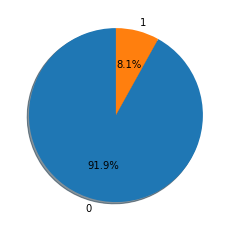

In [13]:
plt.pie(val_tri(application_train.TARGET).values(), labels=val_tri(application_train.TARGET).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

La catégorie 0 concerne les clients ne présentant pas de problèmes de solvabilité. La catégorie 1 concerne les clients présentant des difficultés dans le remboursement du prêt. 

**une première alerte ici est le fait qu'une classe est très largement majoritaire par rapport à une autre ; il conviendra d'être vigilant pour la suite**

## NAME_CONTRACT_TYPE

In [14]:
val_tri(application_train.NAME_CONTRACT_TYPE)

{'Cash loans': 278232, 'Revolving loans': 29279}

Le 'cash loans' désigne un pret d'argent : soit une totalité versée d'un seul tenant. // Le 'revolving loans' désigne le crédit renouvelable, soit un montant accordé à une personne rattaché à un compte bancaire ou une carte bancaire. Le consosommateur peut alors à tout moment dépenser cette somme ; en contre partie des mensualité seront payées pour rétablir les fonds

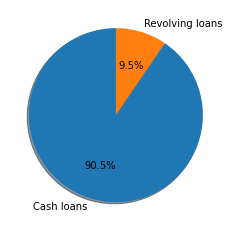

In [15]:
plt.pie(val_tri(application_train.NAME_CONTRACT_TYPE).values(), labels=val_tri(application_train.NAME_CONTRACT_TYPE).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## CODE_GENDER

In [16]:
val_tri(application_train.CODE_GENDER)

{'F': 202448, 'M': 105059, 'XNA': 4}

Suprression de la catégorie XNA non identifiée

In [17]:
application_train.drop(index = application_train.loc[application_train.CODE_GENDER == 'XNA'].index, inplace=True )

In [18]:
application_train.shape

(307507, 122)

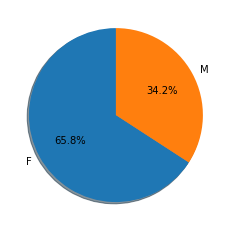

In [19]:
plt.pie(val_tri(application_train.CODE_GENDER).values(), labels=val_tri(application_train.CODE_GENDER).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## FLAG_OWN_CAR

Flag if the client owns a car

In [20]:
val_tri(application_train.FLAG_OWN_CAR)

{'N': 202922, 'Y': 104585}

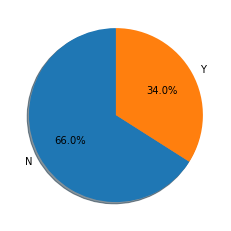

In [21]:
plt.pie(val_tri(application_train.FLAG_OWN_CAR).values(), labels=val_tri(application_train.FLAG_OWN_CAR).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## FLAG_OWN_REALTY

Flag if client owns a house or flat

In [22]:
val_tri(application_train.FLAG_OWN_REALTY)

{'Y': 213308, 'N': 94199}

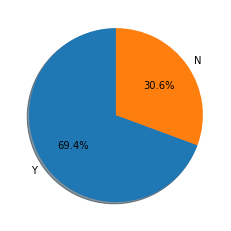

In [23]:
plt.pie(val_tri(application_train.FLAG_OWN_REALTY).values(), labels=val_tri(application_train.FLAG_OWN_REALTY).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## CNT_CHILDREN

Number of children a client have

In [24]:
val_tri(application_train.CNT_CHILDREN)

{0: 215369,
 1: 61118,
 2: 26748,
 3: 3717,
 4: 429,
 5: 84,
 6: 21,
 7: 7,
 14: 3,
 8: 2,
 9: 2,
 12: 2,
 10: 2,
 19: 2,
 11: 1}

In [25]:
application_train.loc[application_train.CNT_CHILDREN == 19]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,-11057,-1853,-3096.0,-745,NaN,1,1,1,1,1,0,Waiters/barmen staff,20.0,2,2,SUNDAY,11,0,0,0,0,0,0,Restaurant,NaN,0.553968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-744.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,-10297,-896,-4733.0,-2599,NaN,1,1,0,1,1,0,Core staff,20.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.779779,0.167332,0.574447,0.1399,0.1232,0.9866,0.7416,0.0209,0.1732,0.1379,0.3021,0.2083,0.0979,0.0504,0.1836,0.0,0.1177,0.063,0.0552,...,0.0211,0.0,0.1379,0.1667,0.2083,0.0278,0.0551,0.0565,0.0,0.0,0.0874,0.1232,0.9831,0.7451,0.0211,0.12,0.1379,0.25,0.2083,0.0804,0.0513,0.0705,0.0,0.0872,reg oper account,block of flats,0.0427,Panel,No,1.0,0.0,1.0,0.0,-2495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Ces deux personnes possèderaient 19 enfants à seulement 30 ans. Cela me semble hautement improbable, je préfère supprimer ces lignes. 

In [26]:
application_train.loc[application_train.CNT_CHILDREN == 14]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,891000.0,Children,Working,Secondary / secondary special,Separated,House / apartment,0.031329,-17754,-1689,-7149.0,-1298,16.0,1,1,0,1,0,0,Drivers,15.0,2,2,FRIDAY,8,0,0,0,0,0,0,Self-employed,NaN,0.513617,0.259468,0.1175,0.1285,0.9896,0.8572,0.0286,0.0,0.2069,0.1667,0.2083,0.025,NaN,0.1174,NaN,0.0,0.1197,0.1333,...,0.0288,0.0,0.2069,0.1667,0.2083,0.0255,NaN,0.1223,NaN,0.0,0.1187,0.1285,0.9896,0.8591,0.0287,0.0,0.2069,0.1667,0.2083,0.0254,NaN,0.1195,NaN,0.0,reg oper account,block of flats,0.0923,Panel,No,0.0,0.0,0.0,0.0,-1718.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,810000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008625,-20308,365243,-12416.0,-3829,6.0,1,0,0,1,0,0,NaN,16.0,2,2,TUESDAY,14,0,0,0,1,0,0,XNA,NaN,0.730308,0.672243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1785.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.011703,-15463,-540,-6222.0,-4317,NaN,1,1,1,1,1,0,Managers,16.0,2,2,SUNDAY,14,0,0,0,0,0,0,Postal,0.54917,0.712226,0.567379,NaN,0.0551,0.9821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0176,NaN,NaN,NaN,0.0571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0184,NaN,NaN,NaN,0.0551,0.9821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN,NaN,NaN,NaN,0.0139,"Stone, brick",No,0.0,0.0,0.0,0.0,-307.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


la femme la plus jeune a 42 ans. je garde ces lignes ainsi que les lignes avec un nombre d'enfant <= 14.

In [27]:
application_train.drop(index = application_train.loc[application_train.CNT_CHILDREN == 19].index, inplace=True )

In [28]:
application_train.shape

(307505, 122)

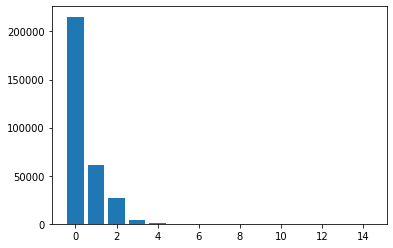

In [29]:
plt.bar(x=val_tri(application_train.CNT_CHILDREN).keys(), height=val_tri(application_train.CNT_CHILDREN).values())
plt.show()

## AMT_INCOME_TOTAL // AMT_CREDIT // AMT_ANNUITY // AMT_GOODS_PRICE

Income of the client // Credit amount of the loan // Loan annuity // For consumer loans it is the price of the goods for which the loan is given

In [30]:
application_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT' ,'AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075050e+05,3.075050e+05,307493.000000,3.072270e+05
mean,1.687981e+05,5.990312e+05,27108.769349,5.384001e+05
std,2.371254e+05,4.024926e+05,14493.788261,3.694473e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [31]:
application_train.drop(index = application_train.loc[application_train.AMT_INCOME_TOTAL > 0.5*10**7].index, inplace = True)

In [32]:
application_train.shape

(307500, 122)

In [33]:
application_train.loc[application_train.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,NaN,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.626896,0.372334,0.0124,NaN,0.9662,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0115,NaN,0.0000,0.0126,NaN,...,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0119,NaN,0.0000,0.0125,NaN,0.9662,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0117,NaN,0.0000,NaN,block of flats,0.0090,"Stone, brick",No,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,NaN,0.727274,0.468660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,NaN,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.885980,0.738370,0.452534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State ser

In [34]:
application_train.AMT_ANNUITY.fillna(value=application_train.AMT_ANNUITY.mean(), inplace=True)

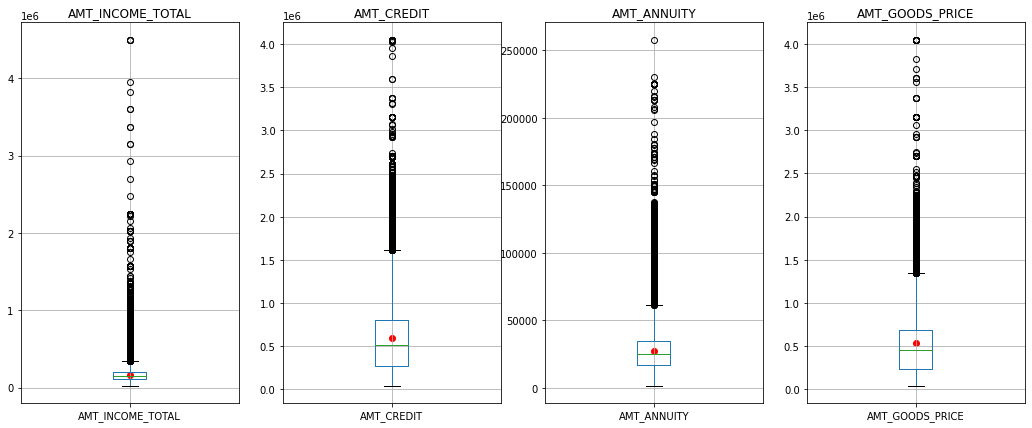

In [35]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 4, 1)
plt.title('AMT_INCOME_TOTAL')
application_train.boxplot('AMT_INCOME_TOTAL')
plt.scatter(x=1, y=application_train['AMT_INCOME_TOTAL'].mean(), color='red')

plt.subplot(1, 4, 2)
plt.title('AMT_CREDIT')
application_train.boxplot('AMT_CREDIT')
plt.scatter(x=1, y=application_train['AMT_CREDIT'].mean(), color='red')

plt.subplot(1, 4, 3)
plt.title('AMT_ANNUITY')
application_train.boxplot('AMT_ANNUITY')
plt.scatter(x=1, y=application_train['AMT_ANNUITY'].mean(), color='red')

plt.subplot(1, 4, 4)
plt.title('AMT_GOODS_PRICE')
application_train.boxplot('AMT_GOODS_PRICE')
plt.scatter(x=1, y=application_train['AMT_GOODS_PRICE'].mean(), color='red')

plt.show()

In [36]:
application_train.drop(index = application_train.loc[application_train.AMT_GOODS_PRICE.isna()].index, inplace=True)

In [37]:
application_train.shape

(307222, 122)

## NAME_TYPE_SUITE

In [38]:
val_tri(application_train.NAME_TYPE_SUITE)

{'Unaccompanied': 248517,
 'Family': 40147,
 'Spouse, partner': 11370,
 'Children': 3267,
 'Other_B': 1770,
 nan: 1014,
 'Other_A': 866,
 'Group of people': 271}

In [39]:
application_train.NAME_TYPE_SUITE.replace(to_replace=['Other_B','nan','Other_A','Group of people'], value='Other',inplace=True)

In [40]:
application_train.NAME_TYPE_SUITE.fillna(value='Other', inplace=True)

In [41]:
val_tri(application_train.NAME_TYPE_SUITE)

{'Unaccompanied': 248517,
 'Family': 40147,
 'Spouse, partner': 11370,
 'Other': 3921,
 'Children': 3267}

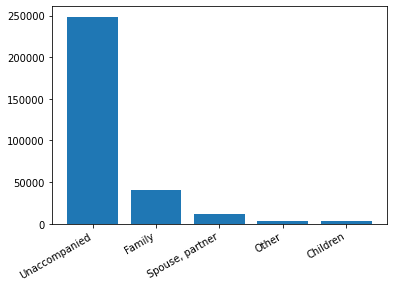

In [42]:
plt.bar(x=val_tri(application_train.NAME_TYPE_SUITE).keys(), height=val_tri(application_train.NAME_TYPE_SUITE).values())
plt.tick_params(axis='x', labelrotation=30)

plt.xticks(ha='right')
plt.show()

## NAME_INCOME_TYPE

In [43]:
val_tri(application_train.NAME_INCOME_TYPE)

{'Working': 158581,
 'Commercial associate': 71567,
 'Pensioner': 55339,
 'State servant': 21680,
 'Unemployed': 22,
 'Student': 18,
 'Businessman': 10,
 'Maternity leave': 5}

In [44]:
# application_train.loc[application_train.NAME_INCOME_TYPE == 'Maternity leave']

liste1 = ['Unemployed', 'Student','Businessman','Maternity leave']

application_train.loc[application_train.NAME_INCOME_TYPE.isin(liste1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,-13964,365243,-115.0,-4746,NaN,1,0,0,1,0,0,NaN,1.0,3,3,FRIDAY,5,0,0,0,0,0,0,XNA,NaN,0.105875,0.824595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-325.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,-15947,365243,-4219.0,-4212,NaN,1,0,0,1,0,0,NaN,3.0,3,2,MONDAY,11,0,0,0,0,0,0,XNA,0.106761,0.617056,0.420611,0.0412,0.0387,0.9786,0.7076,0.0161,0.00,0.0690,0.1667,0.2083,0.0349,0.0319,0.0316,0.0077,0.0071,0.0420,0.0402,...,0.0162,0.0000,0.0690,0.1667,0.2083,0.0357,0.0349,0.0329,0.0078,0.0075,0.0416,0.0387,0.9786,0.7115,0.0162,0.00,0.0690,0.1667,0.2083,0.0355,0.0325,0.0321,0.0078,0.0072,reg oper account,block of flats,0.0351,Panel,No,2.0,0.0,2.0,0.0,-49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
10277,111963,0,Cash loans,M,N,Y,0,180000.0,523597.5,22311.0,468000.0,Unaccompanied,Student,Secondary / secondary special,Married,House / apartment,0.008866,-18790,-3294,-1053.0,-2334,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 2,NaN,0.686956,0.749022,0.0825,0.2017,0.9737,NaN,NaN,NaN,0.1379,0.1667,NaN,0.0415,NaN,0.0633,NaN,0.0822,0.0840,0.2093,...,NaN,NaN,0.1379,0.1667,NaN,0.0424,NaN,0.0660,NaN,0.0871,0.0833,0.2017,0.9737,NaN,NaN,NaN,0.1379,0.1667,NaN,0.0422,NaN,0.0645,NaN,0.0840,NaN,block of flats,0.0501,"Stone, brick",No,0.0,0.0,0.0,0.0,-524.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
application_train.NAME_INCOME_TYPE.replace(to_replace='Unemployed', value='Pensioner', inplace=True)
application_train.NAME_INCOME_TYPE.replace(to_replace='Student', value='State servant', inplace=True)
application_train.NAME_INCOME_TYPE.replace(to_replace='Businessman', value='Commercial associate', inplace=True)
application_train.NAME_INCOME_TYPE.replace(to_replace='Maternity leave', value='Pensioner', inplace=True)

In [46]:
val_tri(application_train.NAME_INCOME_TYPE)

{'Working': 158581,
 'Commercial associate': 71577,
 'Pensioner': 55366,
 'State servant': 21698}

## NAME_EDUCATION_TYPE

Level of highest education the client achieved

In [47]:
val_tri(application_train.NAME_EDUCATION_TYPE)

{'Secondary / secondary special': 218186,
 'Higher education': 74793,
 'Incomplete higher': 10266,
 'Lower secondary': 3813,
 'Academic degree': 164}

## NAME_FAMILY_STATUS

Family status of the client

In [48]:
val_tri(application_train.NAME_FAMILY_STATUS)

{'Married': 196258,
 'Single / not married': 45384,
 'Civil marriage': 29749,
 'Separated': 19757,
 'Widow': 16074}

In [49]:
application_train.drop(index = application_train.loc[application_train.NAME_FAMILY_STATUS=='Unknown'].index, inplace=True)

In [50]:
application_train.shape

(307222, 122)

## NAME_HOUSING_TYPE

What is the housing situation of the client (renting, living with parents, ...)

In [51]:
val_tri(application_train.NAME_HOUSING_TYPE)

{'House / apartment': 272624,
 'With parents': 14822,
 'Municipal apartment': 11165,
 'Rented apartment': 4876,
 'Office apartment': 2615,
 'Co-op apartment': 1120}

## REGION_POPULATION_RELATIVE

Normalized population of region where client lives (higher number means the client lives in more populated region)

In [52]:
application_train.REGION_POPULATION_RELATIVE.describe()

count    307222.000000
mean          0.020870
std           0.013833
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

## DAYS_BIRTH

Client's age in days at the time of application

In [53]:
application_train.DAYS_BIRTH.describe()

count    307222.000000
mean     -16038.803351
std        4363.852030
min      -25229.000000
25%      -19684.000000
50%      -15753.000000
75%      -12415.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Pour plus de compréhension, je convertis days_birth en age et non en jours

In [54]:
application_train['DAYS_BIRTH_1']=application_train['DAYS_BIRTH']/-365

In [55]:
application_train['DAYS_BIRTH_1'].describe()

count    307222.000000
mean         43.941927
std          11.955759
min          20.517808
25%          34.013699
50%          43.158904
75%          53.928767
max          69.120548
Name: DAYS_BIRTH_1, dtype: float64

## DAYS_EMPLOYED

How many days before the application the person started current employment

In [56]:
application_train.DAYS_EMPLOYED.describe()

count    307222.000000
mean      63850.910869
std      141305.723756
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

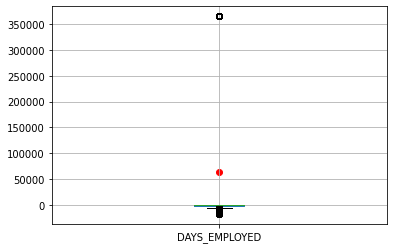

In [57]:
application_train.boxplot('DAYS_EMPLOYED')
plt.scatter(x=1, y=application_train['DAYS_EMPLOYED'].mean(), color='red')

Nous constatons qu'une valeur ressort : 365243. 50 000 lignes sont concernées. En creusant sur le type de revenu, nous constatons que ce sont des personnes qui ne travaillent pas (rentiers ou au chômage).

In [58]:
application_train.loc[application_train.DAYS_EMPLOYED == 365243].NAME_INCOME_TYPE.unique()

array(['Pensioner'], dtype=object)

Je décide de convertir les jours en années positives et de remplacer les valeurs 365243 par 0. 

In [59]:
application_train['DAYS_EMPLOYED_1']=application_train['DAYS_EMPLOYED'].replace(to_replace=365243, value=0)
application_train['DAYS_EMPLOYED_1'] = application_train['DAYS_EMPLOYED_1']/-365
application_train['DAYS_EMPLOYED_1'].describe()

count    307222.000000
mean          5.355335
std           6.320901
min          -0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED_1, dtype: float64

In [60]:
application_train['test_age']= application_train['DAYS_BIRTH_1']-application_train['DAYS_EMPLOYED_1']

In [61]:
application_train.loc[application_train.test_age<=0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,test_age


rapide test de cohérence : age de la personnne > ancienneté sur le poste.

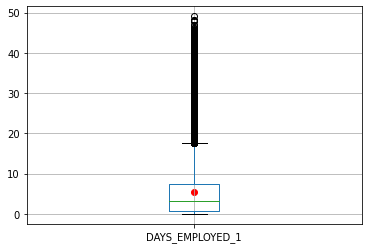

In [62]:
application_train.boxplot('DAYS_EMPLOYED_1')
plt.scatter(x=1, y=application_train['DAYS_EMPLOYED_1'].mean(), color='red')

In [63]:
application_train.loc[application_train.DAYS_EMPLOYED_1 > 40].test_age.min()

17.958904109589035

cohérence d un point de vue ancienneté (>40 ans )

## DAYS_REGISTRATION

How many days before the application did client change his registration

In [64]:
application_train.DAYS_REGISTRATION.describe()

count    307222.000000
mean      -4986.344533
std        3523.195386
min      -24672.000000
25%       -7480.000000
50%       -4504.000000
75%       -2009.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [65]:
application_train['DAYS_REGISTRATION_1'] = application_train['DAYS_REGISTRATION']/-365
application_train['DAYS_REGISTRATION_1'].describe()

count    307222.000000
mean         13.661218
std           9.652590
min          -0.000000
25%           5.504110
50%          12.339726
75%          20.493151
max          67.594521
Name: DAYS_REGISTRATION_1, dtype: float64

In [66]:
application_train['test_age_2']= application_train['DAYS_BIRTH_1']-application_train['DAYS_REGISTRATION_1']
application_train.loc[application_train.test_age_2<0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,test_age,DAYS_REGISTRATION_1,test_age_2
266366,408583,0,Cash loans,F,Y,N,2,157500.0,455040.0,12132.0,360000.0,Other,Working,Secondary / secondary special,Married,House / apartment,0.031329,-10116,-1256,-10116.041667,-2715,9.0,1,1,0,1,0,0,Sales staff,4.0,2,2,TUESDAY,14,0,0,0,0,1,1,Business Entity Type 3,0.594286,0.434526,0.256706,0.0158,0.0075,0.9722,0.6192,0.0022,0.0,0.0803,0.0417,0.0833,0.0323,0.0129,0.014,0.0,0.0028,0.0126,0.0,...,0.0224,0.011,0.012,0.0,0.0,0.0167,0.0,0.9747,0.6578,0.0019,0.0,0.069,0.0417,0.0833,0.0326,0.0137,0.0127,0.0,0.0,reg oper account,block of flats,0.0158,"Stone, brick",No,1.0,0.0,1.0,0.0,-1569.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0,27.715068,3.441096,24.273973,27.715183,-0.000114


pas d'incohérence

## DAYS_ID_PUBLISH

How many days before the application did client change the identity document with which he applied for the loan

In [67]:
application_train.DAYS_ID_PUBLISH.describe()

count    307222.000000
mean      -2994.372512
std        1509.385284
min       -7197.000000
25%       -4299.000000
50%       -3255.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [68]:
application_train['DAYS_ID_PUBLISH_1'] = application_train['DAYS_ID_PUBLISH']/-365
application_train['DAYS_ID_PUBLISH_1'].describe()

count    307222.000000
mean          8.203760
std           4.135302
min          -0.000000
25%           4.712329
50%           8.917808
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH_1, dtype: float64

In [69]:
application_train['test_age_3']= application_train['DAYS_BIRTH_1']-application_train['DAYS_ID_PUBLISH_1']
application_train.loc[application_train.test_age_3<0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,test_age,DAYS_REGISTRATION_1,test_age_2,DAYS_ID_PUBLISH_1,test_age_3


pas d'incohérence

In [70]:
application_train.drop(columns=['test_age','test_age_2','test_age_3'],inplace=True)


In [71]:
application_train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],inplace=True)

## OWN_CAR_AGE

Age of client's car

In [72]:
val_tri(application_train.OWN_CAR_AGE.isna())

{True: 202646, False: 104576}

In [73]:
application_train.OWN_CAR_AGE.fillna(value=0, inplace=True)

In [74]:
application_train.OWN_CAR_AGE.describe()

count    307222.000000
mean          4.105562
std           9.012859
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

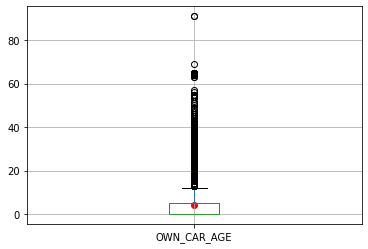

In [75]:
application_train.boxplot('OWN_CAR_AGE')
plt.scatter(x=1, y=application_train['OWN_CAR_AGE'].mean(), color='red')

In [76]:
application_train.loc[application_train.FLAG_OWN_CAR == 'N'].loc[application_train.OWN_CAR_AGE !=0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,...,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,DAYS_REGISTRATION_1,DAYS_ID_PUBLISH_1


test de cohérence : les personnes identifiées plus haut comme personnes ne possédant pas de véhicules , ont bien la colone OWN_CAR_AGE égale à 0

## FLAG_MOBIL

Did client provide mobile phone (1=YES, 0=NO)

In [77]:
val_tri(application_train.FLAG_MOBIL)

{1: 307221, 0: 1}

In [78]:
application_train.drop(columns = ['FLAG_MOBIL'], inplace=True)

In [79]:
application_train.shape

(307222, 121)

## FLAG_EMP_PHONE

Did client provide home phone (1=YES, 0=NO)

In [80]:
val_tri(application_train.FLAG_EMP_PHONE)

{1: 251858, 0: 55364}

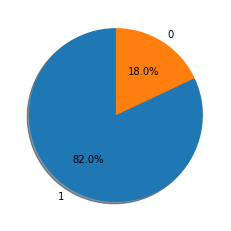

In [81]:
plt.pie(val_tri(application_train.FLAG_EMP_PHONE).values(), labels=val_tri(application_train.FLAG_EMP_PHONE).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## FLAG_WORK_PHONE

Did client provide work phone (1=YES, 0=NO)

In [82]:
val_tri(application_train.FLAG_WORK_PHONE)

{0: 246129, 1: 61093}

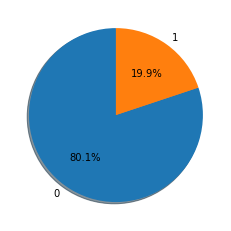

In [83]:
plt.pie(val_tri(application_train.FLAG_WORK_PHONE).values(), labels=val_tri(application_train.FLAG_WORK_PHONE).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## FLAG_CONT_MOBILE

Was mobile phone reachable (1=YES, 0=NO)

In [84]:
val_tri(application_train.FLAG_CONT_MOBILE)

{1: 306648, 0: 574}

In [85]:
application_train.loc[application_train.FLAG_CONT_MOBILE ==  0].TARGET.sum()

45

In [86]:
45/574*100

7.8397212543554

je décide de retirer cette colonne, car le poids des personne en difficulté est trop faible suivant ce critère. (peu d'intérêt).

In [87]:
application_train.drop(columns=['FLAG_CONT_MOBILE'], inplace=True)

In [88]:
application_train.shape

(307222, 120)

## FLAG_PHONE // FLAG_EMAIL

Did client provide home phone / mail (1=YES, 0=NO)

In [89]:
display (val_tri(application_train.FLAG_PHONE), val_tri(application_train.FLAG_EMAIL))

{0: 221003, 1: 86219}

{0: 289798, 1: 17424}

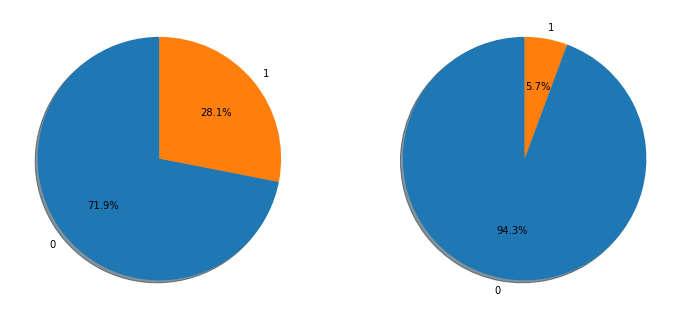

In [90]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.pie(val_tri(application_train.FLAG_PHONE).values(), labels=val_tri(application_train.FLAG_PHONE).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.subplot(1, 2, 2)
plt.pie(val_tri(application_train.FLAG_EMAIL).values(), labels=val_tri(application_train.FLAG_EMAIL).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

## OCCUPATION_TYPE

In [91]:
val_tri(application_train.OCCUPATION_TYPE)

{nan: 96330,
 'Laborers': 55132,
 'Sales staff': 32064,
 'Core staff': 27529,
 'Managers': 21347,
 'Drivers': 18590,
 'High skill tech staff': 11371,
 'Accountants': 9802,
 'Medicine staff': 8528,
 'Security staff': 6713,
 'Cooking staff': 5940,
 'Cleaning staff': 4648,
 'Private service staff': 2648,
 'Low-skill Laborers': 2091,
 'Waiters/barmen staff': 1345,
 'Secretaries': 1305,
 'Realty agents': 751,
 'HR staff': 563,
 'IT staff': 525}

Identification et remplacement des valeurs manquantes.

In [92]:
val_tri(application_train.loc[application_train.OCCUPATION_TYPE.isna()].NAME_INCOME_TYPE)

{'Pensioner': 55360,
 'Working': 24889,
 'Commercial associate': 12291,
 'State servant': 3790}

In [93]:
application_train.loc[(application_train.NAME_INCOME_TYPE=='Pensioner') & (application_train.OCCUPATION_TYPE.isna()),'OCCUPATION_TYPE']='Unemployed or Students'
application_train.loc[(application_train.NAME_INCOME_TYPE=='Working') & (application_train.OCCUPATION_TYPE.isna()),'OCCUPATION_TYPE']='Laborers'
application_train.loc[(application_train.NAME_INCOME_TYPE=='Commercial associate') & (application_train.OCCUPATION_TYPE.isna()),'OCCUPATION_TYPE']='Sales staff'
application_train.loc[(application_train.NAME_INCOME_TYPE=='State servant') & (application_train.OCCUPATION_TYPE.isna()),'OCCUPATION_TYPE']='Unemployed or Students'

In [94]:
val_tri(application_train.loc[application_train.OCCUPATION_TYPE.isna()].NAME_INCOME_TYPE)

{}

In [95]:
val_tri(application_train.OCCUPATION_TYPE)

{'Laborers': 80021,
 'Unemployed or Students': 59150,
 'Sales staff': 44355,
 'Core staff': 27529,
 'Managers': 21347,
 'Drivers': 18590,
 'High skill tech staff': 11371,
 'Accountants': 9802,
 'Medicine staff': 8528,
 'Security staff': 6713,
 'Cooking staff': 5940,
 'Cleaning staff': 4648,
 'Private service staff': 2648,
 'Low-skill Laborers': 2091,
 'Waiters/barmen staff': 1345,
 'Secretaries': 1305,
 'Realty agents': 751,
 'HR staff': 563,
 'IT staff': 525}

## CNT_FAM_MEMBERS

How many family members does client have

In [96]:
val_tri(application_train.CNT_FAM_MEMBERS)

{2.0: 158223,
 1.0: 67784,
 3.0: 52545,
 4.0: 24672,
 5.0: 3472,
 6.0: 407,
 7.0: 81,
 8.0: 20,
 9.0: 6,
 10.0: 3,
 14.0: 2,
 12.0: 2,
 16.0: 2,
 13.0: 1,
 15.0: 1,
 11.0: 1}

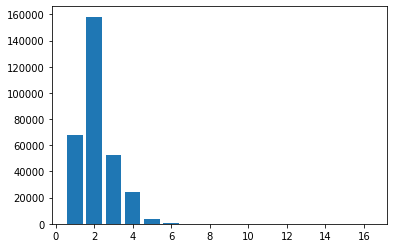

In [97]:
plt.bar(x=val_tri(application_train.CNT_FAM_MEMBERS).keys(), height=val_tri(application_train.CNT_FAM_MEMBERS).values())
plt.show()

## REGION_RATING_CLIENT // REGION_RATING_CLIENT_W_CITY

Our rating of the region where client lives with taking city into account (1,2,3)

In [98]:
display(val_tri(application_train.REGION_RATING_CLIENT),val_tri(application_train.REGION_RATING_CLIENT_W_CITY))

{2: 226752, 3: 48290, 1: 32180}

{2: 229250, 3: 43822, 1: 34150}

In [99]:
application_train['REGION_RATING_CLIENT_MEAN']= application_train[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].mean(axis=1)

In [100]:
val_tri(application_train['REGION_RATING_CLIENT_MEAN'])

{2.0: 226226, 3.0: 43822, 1.0: 32180, 2.5: 3746, 1.5: 1248}

In [101]:
application_train['REGION_RATING_CLIENT_MEAN'].describe()

count    307222.000000
mean          2.041960
std           0.499689
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_MEAN, dtype: float64

In [102]:
application_train.drop(columns=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'],inplace=True)

## WEEKDAY_APPR_PROCESS_START

On which day of the week did the client apply for the loan

In [103]:
val_tri(application_train['WEEKDAY_APPR_PROCESS_START'])

{'TUESDAY': 53854,
 'WEDNESDAY': 51897,
 'MONDAY': 50683,
 'THURSDAY': 50537,
 'FRIDAY': 50283,
 'SATURDAY': 33809,
 'SUNDAY': 16159}

Conversion des jours de la semaine en numéro, en commençant la semaine par lundi = 1

In [104]:
semaine = {'TUESDAY': 2,
 'WEDNESDAY': 3,
 'MONDAY': 1,
 'THURSDAY': 4,
 'FRIDAY': 5,
 'SATURDAY': 6,
 'SUNDAY': 7}

In [105]:
application_train.replace({'WEEKDAY_APPR_PROCESS_START':semaine}, inplace=True)

In [106]:
val_tri(application_train['WEEKDAY_APPR_PROCESS_START'])

{2: 53854, 3: 51897, 1: 50683, 4: 50537, 5: 50283, 6: 33809, 7: 16159}

## HOUR_APPR_PROCESS_START

Approximately at what hour did the client apply for the loan

In [107]:
val_tri(application_train['HOUR_APPR_PROCESS_START'])

{10: 37691,
 11: 37191,
 12: 34196,
 13: 30926,
 14: 27659,
 9: 27366,
 15: 24816,
 16: 20361,
 8: 15110,
 17: 14882,
 7: 9126,
 18: 9041,
 6: 5837,
 19: 3845,
 5: 3638,
 4: 2089,
 3: 1229,
 20: 1193,
 21: 405,
 2: 305,
 22: 149,
 1: 86,
 23: 41,
 0: 40}

Conversion des deux variables cycliques : jours et h en les convertissant via cos et sin

In [108]:
def cyclic_transfo (dataf, nomcol, val_max):
    dataf[nomcol+'_cos'] = np.cos(2 * np.pi * dataf[nomcol]/val_max)
    dataf[nomcol+'_sin'] = np.sin(2 * np.pi * dataf[nomcol]/val_max)
    return dataf

In [109]:
application_train = cyclic_transfo(application_train,'WEEKDAY_APPR_PROCESS_START',7)
application_train = cyclic_transfo(application_train,'HOUR_APPR_PROCESS_START',23)

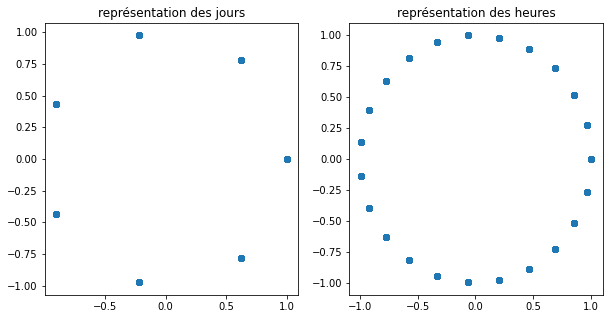

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x=application_train.WEEKDAY_APPR_PROCESS_START_cos, y=application_train.WEEKDAY_APPR_PROCESS_START_sin)
plt.title('représentation des jours')

plt.subplot(122)
plt.scatter(x=application_train.HOUR_APPR_PROCESS_START_cos, y=application_train.HOUR_APPR_PROCESS_START_sin)
plt.title('représentation des heures')
plt.show()

In [111]:
application_train.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], inplace=True)

## REG_REGION_NOT_LIVE_REGION //  REG_REGION_NOT_WORK_REGION // LIVE_REGION_NOT_WORK_REGION // REG_CITY_NOT_LIVE_CITY // REG_CITY_NOT_WORK_CITY // LIVE_CITY_NOT_WORK_CITY

Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

Flag if client's contact address does not match work address (1=different, 0=same, at region level)

Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

Flag if client's contact address does not match work address (1=different, 0=same, at city level)

In [112]:
display('REG_REGION_NOT_LIVE_REGION',val_tri(application_train['REG_REGION_NOT_LIVE_REGION']),
        'REG_REGION_NOT_WORK_REGION',val_tri(application_train['REG_REGION_NOT_WORK_REGION']),
        'LIVE_REGION_NOT_WORK_REGION',val_tri(application_train['LIVE_REGION_NOT_WORK_REGION']), 
        'REG_CITY_NOT_LIVE_CITY',val_tri(application_train['REG_CITY_NOT_LIVE_CITY']), 
        'REG_CITY_NOT_WORK_CITY',val_tri(application_train['REG_CITY_NOT_WORK_CITY']), 
        'LIVE_CITY_NOT_WORK_CITY',val_tri(application_train['LIVE_CITY_NOT_WORK_CITY']))

'REG_REGION_NOT_LIVE_REGION'

{0: 302567, 1: 4655}

'REG_REGION_NOT_WORK_REGION'

{0: 291625, 1: 15597}

'LIVE_REGION_NOT_WORK_REGION'

{0: 294733, 1: 12489}

'REG_CITY_NOT_LIVE_CITY'

{0: 283208, 1: 24014}

'REG_CITY_NOT_WORK_CITY'

{0: 236434, 1: 70788}

'LIVE_CITY_NOT_WORK_CITY'

{0: 252071, 1: 55151}

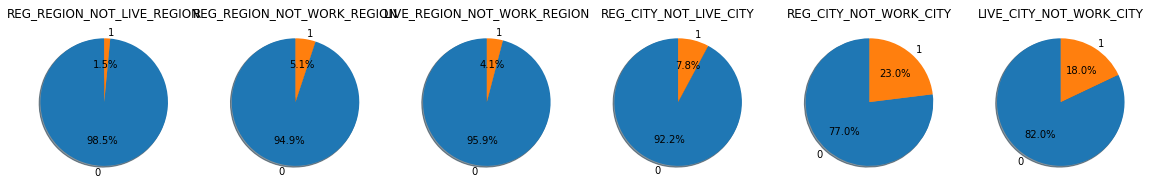

In [113]:
plt.figure(figsize=(20,10))

plt.subplot(1, 6, 1)
plt.pie(val_tri(application_train.REG_REGION_NOT_LIVE_REGION).values(), labels=val_tri(application_train.REG_REGION_NOT_LIVE_REGION).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REG_REGION_NOT_LIVE_REGION')

plt.subplot(1, 6, 2)
plt.pie(val_tri(application_train.REG_REGION_NOT_WORK_REGION).values(), labels=val_tri(application_train.REG_REGION_NOT_WORK_REGION).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REG_REGION_NOT_WORK_REGION')

plt.subplot(1, 6, 3)
plt.pie(val_tri(application_train.LIVE_REGION_NOT_WORK_REGION).values(), labels=val_tri(application_train.LIVE_REGION_NOT_WORK_REGION).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('LIVE_REGION_NOT_WORK_REGION')

plt.subplot(1, 6, 4)
plt.pie(val_tri(application_train.REG_CITY_NOT_LIVE_CITY).values(), labels=val_tri(application_train.REG_CITY_NOT_LIVE_CITY).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REG_CITY_NOT_LIVE_CITY')

plt.subplot(1, 6, 5)
plt.pie(val_tri(application_train.REG_CITY_NOT_WORK_CITY).values(), labels=val_tri(application_train.REG_CITY_NOT_WORK_CITY).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REG_CITY_NOT_WORK_CITY')

plt.subplot(1, 6, 6)
plt.pie(val_tri(application_train.LIVE_CITY_NOT_WORK_CITY).values(), labels=val_tri(application_train.LIVE_CITY_NOT_WORK_CITY).keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('LIVE_CITY_NOT_WORK_CITY')

plt.show()

## ORGANIZATION_TYPE

Type of organization where client works

In [114]:
val_tri(application_train['ORGANIZATION_TYPE'])

{'Business Entity Type 3': 67930,
 'XNA': 55352,
 'Self-employed': 38360,
 'Other': 16669,
 'Medicine': 11181,
 'Business Entity Type 2': 10542,
 'Government': 10391,
 'School': 8883,
 'Trade: type 7': 7826,
 'Kindergarten': 6870,
 'Construction': 6714,
 'Business Entity Type 1': 5980,
 'Transport: type 4': 5391,
 'Trade: type 3': 3489,
 'Industry: type 9': 3367,
 'Industry: type 3': 3275,
 'Security': 3242,
 'Housing': 2953,
 'Industry: type 11': 2703,
 'Military': 2630,
 'Bank': 2505,
 'Agriculture': 2451,
 'Police': 2337,
 'Transport: type 2': 2203,
 'Postal': 2154,
 'Security Ministries': 1972,
 'Trade: type 2': 1892,
 'Restaurant': 1806,
 'Services': 1573,
 'University': 1326,
 'Industry: type 7': 1307,
 'Transport: type 3': 1185,
 'Industry: type 1': 1039,
 'Hotel': 966,
 'Electricity': 949,
 'Industry: type 4': 877,
 'Trade: type 6': 631,
 'Industry: type 5': 599,
 'Insurance': 596,
 'Telecom': 576,
 'Emergency': 560,
 'Industry: type 2': 458,
 'Advertising': 429,
 'Realtor': 39

In [115]:
application_train.loc[application_train['ORGANIZATION_TYPE']=='XNA'].NAME_INCOME_TYPE.unique()

array(['Pensioner'], dtype=object)

In [116]:
application_train['ORGANIZATION_TYPE'].replace(to_replace='XNA', value='Pension', inplace=True)

In [117]:
val_tri(application_train['ORGANIZATION_TYPE'])

{'Business Entity Type 3': 67930,
 'Pension': 55352,
 'Self-employed': 38360,
 'Other': 16669,
 'Medicine': 11181,
 'Business Entity Type 2': 10542,
 'Government': 10391,
 'School': 8883,
 'Trade: type 7': 7826,
 'Kindergarten': 6870,
 'Construction': 6714,
 'Business Entity Type 1': 5980,
 'Transport: type 4': 5391,
 'Trade: type 3': 3489,
 'Industry: type 9': 3367,
 'Industry: type 3': 3275,
 'Security': 3242,
 'Housing': 2953,
 'Industry: type 11': 2703,
 'Military': 2630,
 'Bank': 2505,
 'Agriculture': 2451,
 'Police': 2337,
 'Transport: type 2': 2203,
 'Postal': 2154,
 'Security Ministries': 1972,
 'Trade: type 2': 1892,
 'Restaurant': 1806,
 'Services': 1573,
 'University': 1326,
 'Industry: type 7': 1307,
 'Transport: type 3': 1185,
 'Industry: type 1': 1039,
 'Hotel': 966,
 'Electricity': 949,
 'Industry: type 4': 877,
 'Trade: type 6': 631,
 'Industry: type 5': 599,
 'Insurance': 596,
 'Telecom': 576,
 'Emergency': 560,
 'Industry: type 2': 458,
 'Advertising': 429,
 'Realtor'

## EXT_SOURCE_1 // EXT_SOURCE_2 // EXT_SOURCE_3

In [118]:
application_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,133993.000000,3.065630e+05,246328.000000
mean,0.502175,5.143932e-01,0.510886
std,0.211068,1.910690e-01,0.194847
min,0.014568,8.173617e-08,0.000527
25%,0.334060,3.924444e-01,0.370650
50%,0.506055,5.659722e-01,0.535276
75%,0.675122,6.636293e-01,0.669057
max,0.962693,8.549997e-01,0.896010


In [119]:
application_train['EXT_SOURCE_AVG']=np.mean(application_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']], axis=1)

In [120]:
application_train.loc[application_train['EXT_SOURCE_AVG'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,DAYS_REGISTRATION_1,DAYS_ID_PUBLISH_1,REGION_RATING_CLIENT_MEAN,WEEKDAY_APPR_PROCESS_START_cos,WEEKDAY_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos,HOUR_APPR_PROCESS_START_sin,EXT_SOURCE_AVG
349,100402,0,Cash loans,F,N,Y,0,81000.0,276277.5,21825.0,238500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.005144,0.0,0,0,0,0,Unemployed or Students,1.0,0,0,0,0,0,0,Pension,NaN,NaN,NaN,0.0495,0.0413,0.9692,NaN,NaN,0.0,0.0690,0.0833,NaN,0.0215,NaN,0.0186,NaN,0.0000,0.0504,0.0429,0.9692,NaN,NaN,0.0000,0.0690,0.0833,NaN,0.0220,NaN,0.0194,...,0.0500,0.0413,0.9692,NaN,NaN,0.0,0.0690,0.0833,NaN,0.0219,NaN,0.0190,NaN,0.0000,NaN,specific housing,0.0213,"Stone, brick",No,1.0,0.0,1.0,0.0,-275.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,54.191781,-0.000000,30.816438,9.126027,2.0,0.623490,7.818315e-01,-0.576680,-0.816970,NaN
3525,104116,1,Cash loans,F,N,Y,0,65025.0,148500.0,10093.5,148500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.020713,0.0,0,0,0,0,Unemployed or Students,2.0,0,0,0,0,0,0,Pension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,62.687671,-0.000000,1.942466,14.389041,3.0,0.623490,7.818315e-01,-0.334880,0.942261,NaN
4562,105334,0,Cash loans,M,N,N,0,99000.0,291384.0,20407.5,270000.0,"Spouse, partner",Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.010032,0.0,0,0,1,0,Unemployed or Students,2.0,0,0,0,0,0,0,Pension,NaN,NaN,NaN,NaN,NaN,0.9757,NaN,NaN,NaN,0.0690,0.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9757,NaN,NaN,NaN,0.0690,0.1250,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9757,NaN,NaN,NaN,0.0690,0.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,block of flats,0.0196,"Stone, brick",No,0.0,0.0,0.0,0.0,-1101.0,0,1,0,0,0,0,0,0,0,0,

In [121]:
application_train['EXT_SOURCE_AVG'].fillna(application_train['EXT_SOURCE_AVG'].mean(),inplace = True)

In [122]:
application_train.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], inplace=True)

## APARTMENTS_AVG : EMERGENCYSTATE_MODE

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [123]:
application_train.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].describe()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
count,151320.000000,127457.000000,157366.000000,102944.000000,92580.000000,143499.000000,152549.000000,154356.000000,98790.000000,124819.000000,97236.000000,153031.000000,93923.000000,137716.000000,151320.000000,127457.000000,157366.000000,102944.000000,92580.000000,143499.000000,152549.000000,154356.000000,98790.000000,124819.000000,97236.000000,153031.000000,93923.000000,137716.000000,151320.000000,127457.000000,157366.000000,102944.000000,92580.000000,143499.000000,152549.000000,154356.000000,98790.000000,124819.000000,97236.000000,153031.000000,93923.000000,137716.000000,158942.000000
mean,0.117461,0.088454,0.977731,0.752472,0.044621,0.078963,0.149741,0.226314,0.231916,0.066344,0.100790,0.107425,0.008811,0.028361,0.114250,0.087554,0.977061,0.759635,0.042552,0.074509,0.145207,0.222347,0.228081,0.064968,0.105659,0.105999,0.008078,0.027024,0.117870,0.087967,0.977748,0.755746,0.044595,0.078099,0.149229,0.225929,0.231648,0.067179,0.101970,0.108633,0.008653,0.028238,0.102568
std,0.108259,0.082456,0.059249,0.113282,0.076040,0.134604,0.100063,0.144647,0.161385,0.081202,0.092596,0.110586,0.047749,0.069540,0.107954,0.084325,0.064603,0.110113,0.074447,0.132284,0.100991,0.143718,0.161170,0.081769,0.097900,0.111866,0.046293,0.070270,0.109095,0.082196,0.059923,0.112068,0.076148,0.134495,0.100382,0.145073,0.161938,0.082186,0.093662,0.112282,0.047432,0.070183,0.107482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.057700,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.000000,0.069000,0.166700,0.083300,0.018700,0.051300,0.045800,0.000000,0.000000,0.041200
50%,0.087600,0.076300,0.981600,0.755200,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000,0.074600,0.981600,0.764800,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100,0.000000,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.000000,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800
75%,0.148500,0.112200,0.986600,0.823200,0.051500,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700,0.145000,0.112400,0.986600,0.823600,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200,0.003900,0.023100,0.148900,0.111600,0.986600,0.825600,0.051300,0.120000,0.206900,0.333300,0.375000,0.086800,0.123100,0.130400,0.003900,0.026600,0.127600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

A première vue je ne vois pas de valeurs aberrantes ( valeurs négatives, ou , en l'occurence ici, avec un max différent de 1 ).Les valeurs sont normalisées donc comprises entre 0 et 1. 

Je décide de remplacer les Nan par 0 // à voir si par la suite cela à un trop grand impact, dans ce cas je testerai en supprimant ces colonnes.

In [124]:
application_train.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE']=application_train.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].fillna(0)

In [125]:
application_train.FONDKAPREMONT_MODE.replace(to_replace=0,value='None',inplace=True)
application_train.HOUSETYPE_MODE.replace(to_replace=0,value='None',inplace=True)
application_train.WALLSMATERIAL_MODE.replace(to_replace=0,value='None',inplace=True)
application_train.EMERGENCYSTATE_MODE.replace(to_replace=0,value='None',inplace=True)

In [126]:
application_train.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].select_dtypes('object')

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,reg oper account,block of flats,"Stone, brick",No
1,reg oper account,block of flats,Block,No
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
307506,reg oper account,block of flats,"Stone, brick",No
307507,reg oper account,block of flats,"Stone, brick",No
307508,reg oper account,block of flats,Panel,No
307509,None,block of flats,"Stone, brick",No


In [127]:
val_tri(application_train.FONDKAPREMONT_MODE)

{'None': 210079,
 'reg oper account': 73774,
 'reg oper spec account': 12072,
 'not specified': 5682,
 'org spec account': 5615}

In [128]:
val_tri(application_train.HOUSETYPE_MODE)

{'None': 154142,
 'block of flats': 150373,
 'specific housing': 1497,
 'terraced house': 1210}

In [129]:
val_tri(application_train.WALLSMATERIAL_MODE)

{'None': 156187,
 'Panel': 65993,
 'Stone, brick': 64752,
 'Block': 9240,
 'Wooden': 5353,
 'Mixed': 2295,
 'Monolithic': 1777,
 'Others': 1625}

In [130]:
val_tri(application_train.EMERGENCYSTATE_MODE)

{'No': 159292, 'None': 145604, 'Yes': 2326}

## OBS_30_CNT_SOCIAL_CIRCLE : DEF_60_CNT_SOCIAL_CIRCLE

In [131]:
application_train.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE'].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306201.000000,306201.000000,306201.000000,306201.000000
mean,1.422376,0.143412,1.405430,0.100029
std,2.401119,0.446670,2.379945,0.362205
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [132]:
application_train.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
application_train.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
application_train.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
application_train.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

## DAYS_LAST_PHONE_CHANGE


How many days before application did client change phone

In [133]:
application_train.DAYS_LAST_PHONE_CHANGE.describe()

count    307221.000000
mean       -962.889321
std         826.924974
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [134]:
application_train['DAYS_LAST_PHONE_CHANGE_1']= application_train['DAYS_LAST_PHONE_CHANGE']/-365

In [135]:
application_train.DAYS_LAST_PHONE_CHANGE_1.describe()

count    307221.000000
mean          2.638053
std           2.265548
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE_1, dtype: float64

In [136]:
application_train.loc[application_train.DAYS_LAST_PHONE_CHANGE_1.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_1,DAYS_EMPLOYED_1,DAYS_REGISTRATION_1,DAYS_ID_PUBLISH_1,REGION_RATING_CLIENT_MEAN,WEEKDAY_APPR_PROCESS_START_cos,WEEKDAY_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos,HOUR_APPR_PROCESS_START_sin,EXT_SOURCE_AVG,DAYS_LAST_PHONE_CHANGE_1
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,21.0,1,0,0,0,Laborers,2.0,0,0,0,0,0,0,Trade: type 3,0.1237,0.0601,0.993,0.0,0.0,0.12,0.1034,0.375,0.0,0.0809,0.0,0.1283,0.0,0.0,0.1261,0.0624,0.993,0.0,0.0,0.1208,0.1034,0.375,0.0,0.0828,0.0,0.1337,0.0,0.0,0.1249,0.0601,0.993,0.0,0.0,0.12,0.1034,0.375,0.0,0.0823,0.0,0.1306,0.0,0.0,None,block of flats,0.1067,Panel,No,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,23.490411,0.80274,13.123288,2.945205,2.0,-0.222521,-0.974928,-0.917211,-0.398401,0.509264,NaN


In [137]:
application_train.DAYS_LAST_PHONE_CHANGE_1.fillna(value=application_train.DAYS_LAST_PHONE_CHANGE_1.mean(),inplace=True)

In [138]:
application_train.drop(columns=['DAYS_LAST_PHONE_CHANGE'], inplace=True)

## FLAG_DOCUMENT_2 : FLAG_DOCUMENT_21

Did client provide document 2 to 21

In [139]:
application_train['number_documents_provided']= application_train.loc[:,'FLAG_DOCUMENT_2' : 'FLAG_DOCUMENT_21'].sum(axis=1)

In [140]:
application_train.number_documents_provided.describe()

count    307222.000000
mean          0.930184
std           0.344313
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: number_documents_provided, dtype: float64

In [141]:
application_train.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],inplace=True)

## AMT_REQ_CREDIT_BUREAU_HOUR : AMT_REQ_CREDIT_BUREAU_YEAR

Number of enquiries to Credit Bureau about the client one hour before application

Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [142]:
application_train.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265751.000000,265751.000000,265751.000000,265751.000000,265751.000000,265751.000000
mean,0.006404,0.007007,0.034374,0.267525,0.265531,1.900234
std,0.083865,0.110807,0.204732,0.916276,0.794250,1.869467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Je décide de remplacer les Nan par la médiane (0, sauf pour la dernière colonne)

In [143]:
application_train.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
application_train.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0,inplace=True)
application_train.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)
application_train.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
application_train.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)
application_train.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(1,inplace=True)

In [144]:
filling_rate(application_train)

                                variable name    data not NaN             type    Filling Rate  %
                                   SK_ID_CURR          307222            int64        100.0000 %
                                       TARGET          307222            int64        100.0000 %
                           NAME_CONTRACT_TYPE          307222           object        100.0000 %
                                  CODE_GENDER          307222           object        100.0000 %
                                 FLAG_OWN_CAR          307222           object        100.0000 %
                              FLAG_OWN_REALTY          307222           object        100.0000 %
                                 CNT_CHILDREN          307222            int64        100.0000 %
                             AMT_INCOME_TOTAL          307222          float64        100.0000 %
                                   AMT_CREDIT          307222          float64        100.0000 %
                             

In [145]:
application_train.to_csv('application_train.csv',sep='\t')